In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
athlete_events = pd.read_csv('e:/datas/athlete_events.csv')

In [5]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
# 查看空值
athlete_events.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
# 查看描述性统计
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


> 运动员平均年龄25岁，平均身高175，平均体重70千克

### 看看奥运会都有哪些比赛项目

In [9]:
athlete_events['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [14]:
# 项目词云
from pyecharts.charts import WordCloud
sport_counts = athlete_events['Sport'].value_counts()
sport_counts = list(zip(sport_counts.index.tolist(),sport_counts.values.tolist()))
word = WordCloud()
word.add('',sport_counts[:50])
word.render_notebook()

### 参赛人员男女比例

In [19]:
from pyecharts.charts import Pie
sex_counts = athlete_events['Sex'].value_counts()
print(sex_counts)
pie = Pie()
pie.add('',zip(sex_counts.index.tolist(),sex_counts.values.tolist()))
pie.render_notebook()

M    196594
F     74522
Name: Sex, dtype: int64


### 查看男女的年龄分布

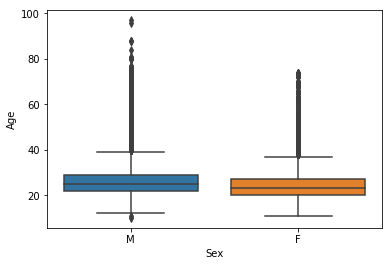

In [22]:
sns.boxplot(y='Age',x='Sex',data=athlete_events)

### 看看历年来，参加奥运会男女人数的变化

In [25]:
year_grouped = athlete_events.groupby('Year')
year_grouped['Sex'].value_counts()

Year  Sex
1896  M        380
1900  M       1903
      F         33
1904  M       1285
      F         16
1906  M       1722
      F         11
1908  M       3054
      F         47
1912  M       3953
      F         87
1920  M       4158
      F        134
1924  M       5432
      F        261
1928  M       5137
      F        437
1932  M       2952
      F        369
1936  M       6852
      F        549
1948  M       6719
      F        761
1952  M       7676
      F       1682
1956  M       5295
      F       1139
1960  M       7505
      F       1730
1964  M       7728
             ...  
1984  M       8605
      F       2983
1988  M      10453
      F       4223
1992  M      11235
      F       5178
1994  M       2055
      F       1105
1996  M       8772
      F       5008
1998  M       2221
      F       1384
2000  M       8390
      F       5431
2002  M       2527
      F       1582
2004  M       7897
      F       5546
2006  M       2625
      F       1757
2008  M       7786
  

Text(0.5,1,'历届夏季奥运会男女人数变化图')

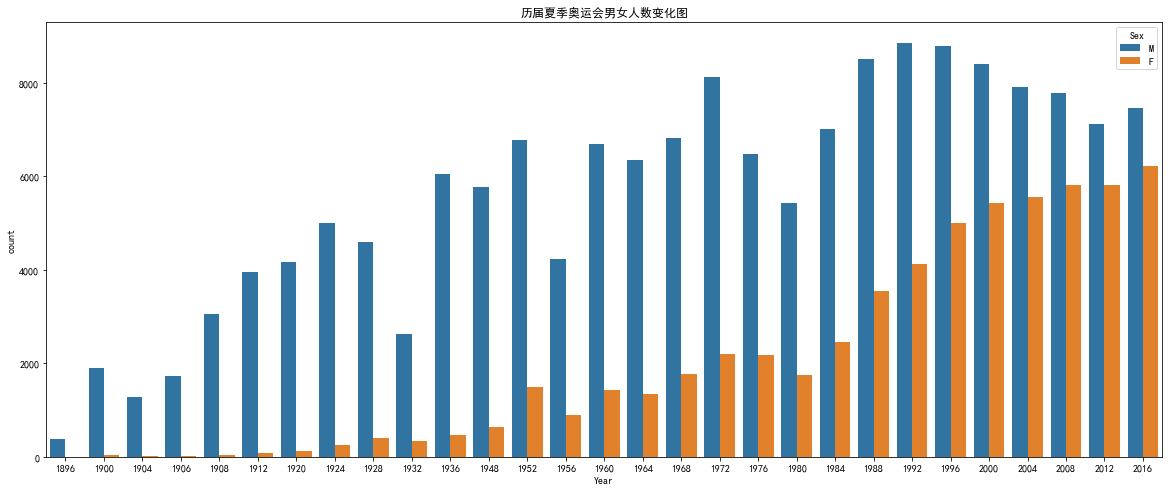

In [35]:
plt.rcParams['font.family']='SimHei'
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Year',hue='Sex',data=athlete_events.query("Season=='Summer'"))
ax.set_title('历届夏季奥运会男女人数变化图')

Text(0.5,1,'历届冬季奥运会男女人数变化图')

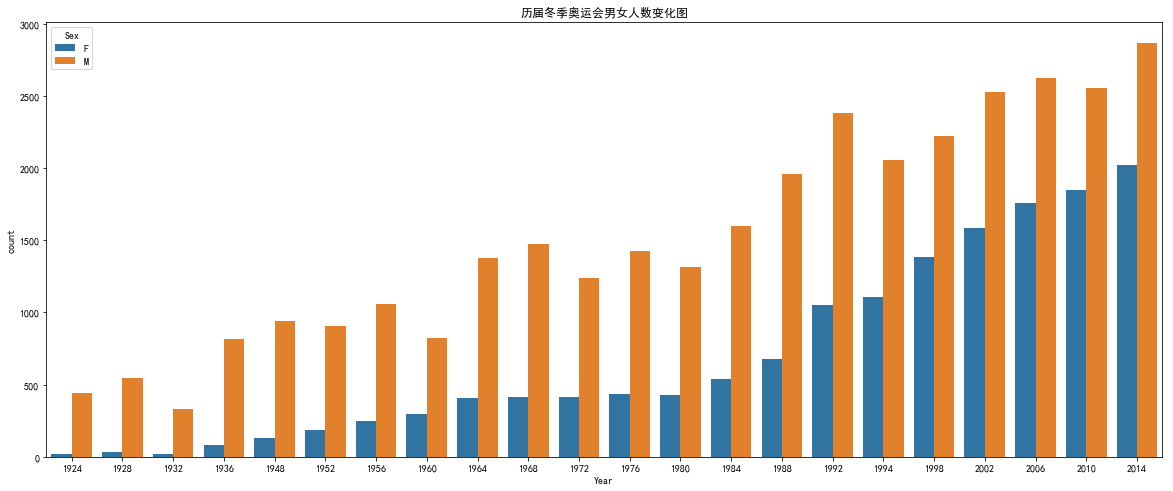

In [36]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Year',hue='Sex',data=athlete_events.query("Season=='Winter'"))
ax.set_title('历届冬季奥运会男女人数变化图')

> 可以看出女性越来越多的参与到奥运会之中

In [38]:
athlete_events['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

### 获得金牌最多的国家

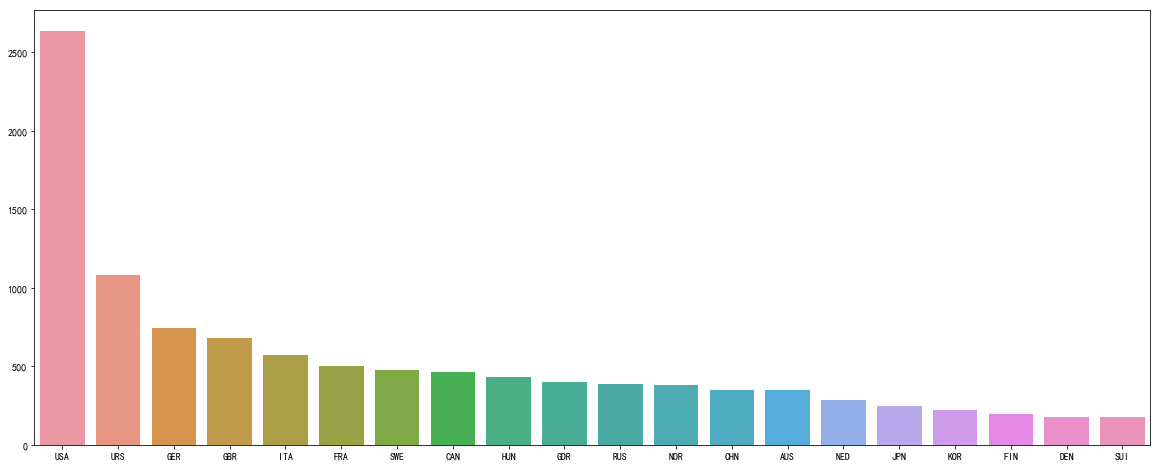

In [43]:
gold_counts = athlete_events[athlete_events['Medal']=='Gold']['NOC'].value_counts()[:20]
plt.figure(figsize=(20,8))
sns.barplot(x=list(gold_counts.index),y=list(gold_counts.values))

> 美国金牌数，遥遥领先其他国家

### 看看中国队历届奥运会表现如何

In [47]:
china_data = athlete_events.query("NOC=='CHN'")

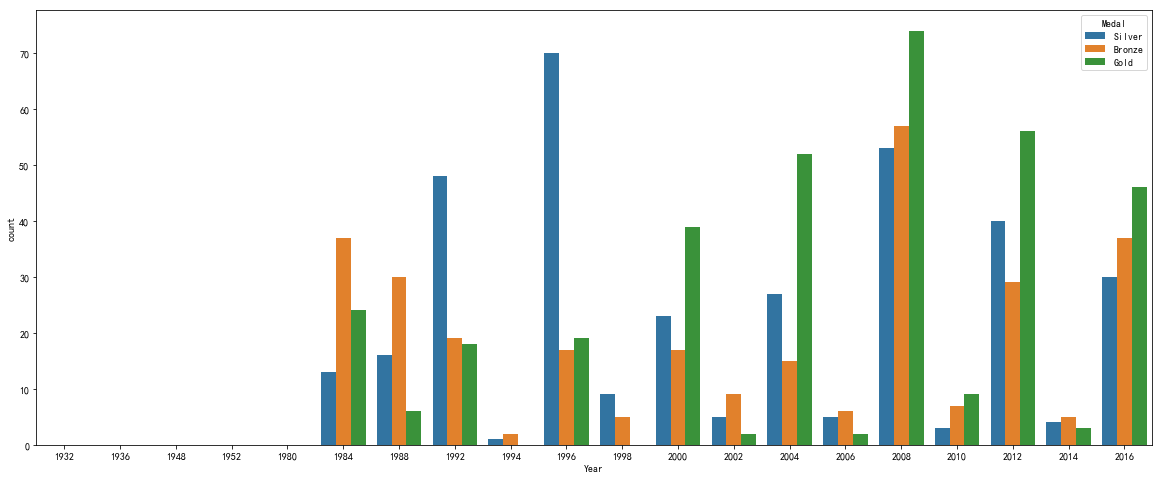

In [51]:
# 奖牌数
plt.figure(figsize=(20,8))
sns.countplot(x='Year',hue='Medal',data=china_data)

> 1984年实现奖牌0突破，2018年北京奥运会大丰收

### 看看哪些项目获得金牌最多

In [54]:
top_10 = china_data.query("Medal=='Gold'")['Sport'].value_counts()[:10]

In [56]:
from pyecharts.charts import Funnel
funnel = Funnel()
funnel.add('',list(zip(top_10.index.tolist(),top_10.values.tolist())))
funnel.render_notebook()